## LEVEL-2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10,5

In [2]:
import gdal
img = gdal.Open(r'D:\pixxel\EO1H1480472016328110PZ_1GST\QUAC\QUAC_ready.tif')
img1 = img.ReadAsArray()
geo = img.GetGeoTransform()
proj = img.GetProjection()

In [3]:
img1.shape

(163, 3481, 1021)

In [4]:
print(geo)

(263700.0, 29.97062, 0.0, 2165100.0, 0.0, -29.99138)


In [5]:
print(proj)

PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32643"]]


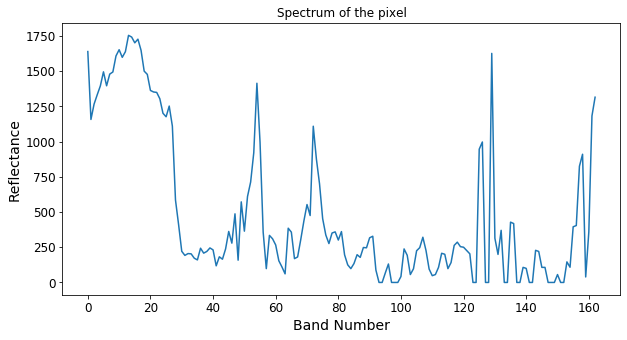

In [8]:
plt.plot(img1[:,3400,200])
plt.title("Spectrum of the pixel")
plt.xlabel("Band Number")
plt.ylabel("Reflectance")
plt.show()

## 3 Band Averaging

In [9]:
x1 =[]
start = 0
for k in range(3,img1.shape[0],3):
    temp = img1[start:k,:,:]
    mean_img = np.mean(temp,axis = 0)
    start = k
    x1.append(mean_img)

In [10]:
img1.shape

(163, 3481, 1021)

In [11]:
x1 = np.array(x1)
x1.shape

(54, 3481, 1021)

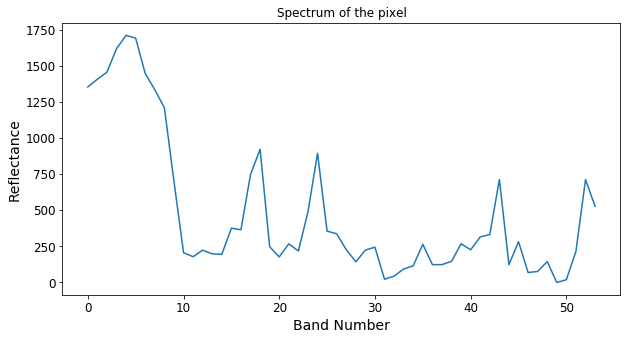

In [15]:
plt.plot(x1[:,3400,200])
plt.title("Spectrum of the pixel")
plt.xlabel("Band Number")
plt.ylabel("Reflectance")
plt.show()

## 5 Band Averaging

In [13]:
x2 =[]
start = 0
for k in range(5,img1.shape[0],5):
    temp = img1[start:k,:,:]
    mean_img = np.mean(temp,axis = 0)
    start = k
    x2.append(mean_img)

In [14]:
x2 = np.array(x2)
x2.shape

(32, 3481, 1021)

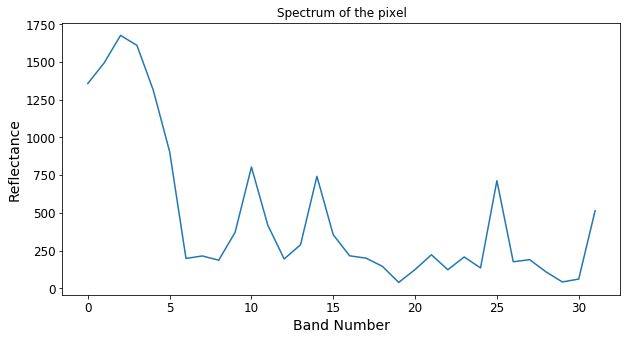

In [16]:
plt.plot(x2[:,3400,200])
plt.title("Spectrum of the pixel")
plt.xlabel("Band Number")
plt.ylabel("Reflectance")
plt.show()

## 7 Band Averaging

In [17]:
x3 =[]
start = 0
for k in range(7,img1.shape[0],7):
    temp = img1[start:k,:,:]
    mean_img = np.mean(temp,axis = 0)
    start = k
    x3.append(mean_img)

In [18]:
x3 = np.array(x3)
x3.shape

(23, 3481, 1021)

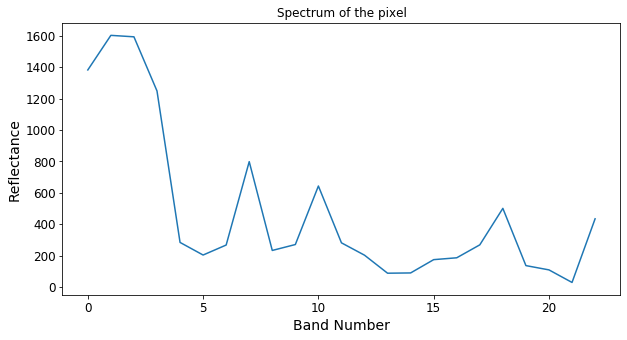

In [19]:
plt.plot(x3[:,3400,200])
plt.title("Spectrum of the pixel")
plt.xlabel("Band Number")
plt.ylabel("Reflectance")
plt.show()

## 11 Band Averaging

In [20]:
x4 =[]
start = 0
for k in range(11,img1.shape[0],11):
    temp = img1[start:k,:,:]
    mean_img = np.mean(temp,axis = 0)
    start = k
    x4.append(mean_img)

In [21]:
x4 = np.array(x4)
x4.shape

(14, 3481, 1021)

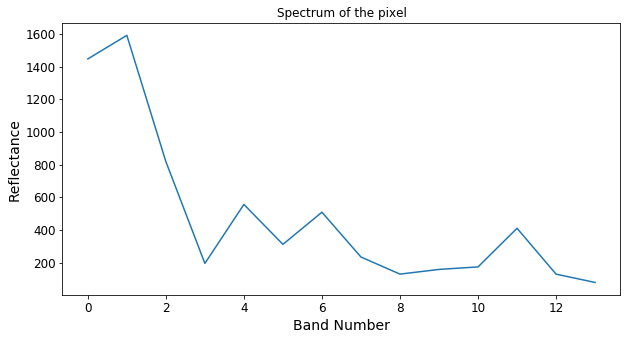

In [22]:
plt.plot(x4[:,3400,200])
plt.title("Spectrum of the pixel")
plt.xlabel("Band Number")
plt.ylabel("Reflectance")
plt.show()

## 15 Band Averaging

In [6]:
x5 =[]
start = 0
for k in range(11,img1.shape[0],15):
    temp = img1[start:k,:,:]
    mean_img = np.mean(temp,axis = 0)
    start = k
    x5.append(mean_img)

In [7]:
x5 = np.array(x5)
x5.shape

(11, 3481, 1021)

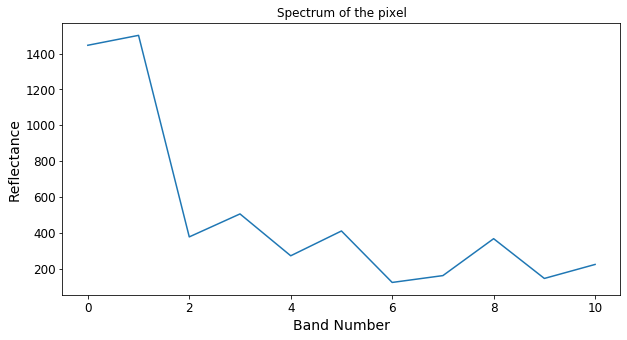

In [8]:
plt.plot(x5[:,3400,200])
plt.title("Spectrum of the pixel")
plt.xlabel("Band Number")
plt.ylabel("Reflectance")
plt.show()

## Saving Files

In [9]:
def CreateGeoTiff(Name, Array, driver,GeoT, Projection, DataType):
    DataSet = driver.Create(Name, Array.shape[2], Array.shape[1], Array.shape[0], DataType)
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection(Projection)
    for i, image in enumerate(Array, 1):
        DataSet.GetRasterBand(i).WriteArray( image )
    DataSet.FlushCache()
    return Name

In [25]:
driver = gdal.GetDriverByName("GTiff")
output1 = r'tile1_avg3.tiff'
CreateGeoTiff(output1, x1, driver,geo, proj,gdal.GDT_Float32)

'tile1_avg3.tiff'

In [26]:
output2 = r'tile1_avg5.tiff'
CreateGeoTiff(output2, x2, driver,geo, proj,gdal.GDT_Float32)

'tile1_avg5.tiff'

In [27]:
output3 = r'tile1_avg7.tiff'
CreateGeoTiff(output3, x3, driver,geo, proj,gdal.GDT_Float32)

'tile1_avg7.tiff'

In [28]:
output4 = r'tile1_avg11.tiff'
CreateGeoTiff(output4, x4, driver,geo, proj,gdal.GDT_Float32)

'tile1_avg11.tiff'

In [11]:
output5 = r'tile1_avg15.tiff'
CreateGeoTiff(output5, x5, driver,geo, proj,gdal.GDT_Float32)

'tile1_avg15.tiff'